1.0 데이터 가져오기

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Importing training set
training_set = pd.read_csv("../input/exoTrain.csv")
training_set.head()
X_train = training_set.iloc[:,1:].values
Y_train = training_set.iloc[:,0:1].values

#Importing test set
test_set = pd.read_csv("../input/exoTest.csv")
X_test = test_set.iloc[:,1:].values
Y_test = test_set.iloc[:,0:1].values


#print(X_train)
#print(Y_train)

1.1 label값을 0과 1로 만들기

In [2]:
# Class를 0과 1로 만들기
for i in range(len(Y_train)):
    Y_train[i] -= 1
    
for i in range(len(Y_test)):
    Y_test[i] -= 1
    
#print(Y_train)

1.2 class 개수 비교. 데이터 불균형을 확인할 수 있다.

Class=0, n=5050 (99.273%)
Class=1, n=37 (0.727%)


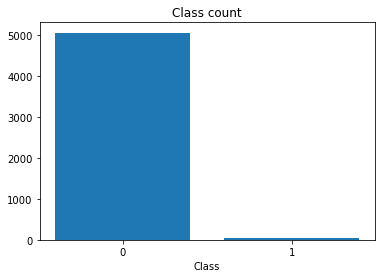

In [3]:
# 클래스 개수 그래프 그리기
def classcount(Y_train):                 # 2차원 ndarray가 인수
    y = Y_train.reshape(len(Y_train),)   # 1차원 ndarray로 변환
    y = y.tolist()                       # 리스트로 변환
    c0 = 0  
    c1 = 0
    for i in y:
        if i == 0:
            c0 += 1    # 행성 x
        else:
            c1 += 1    # 행성 o
    
    y_count = [c0 , c1]
    print('Class=0, n=%d (%.3f%%)' % (y_count[0], y_count[0] / len(y) * 100))
    print('Class=1, n=%d (%.3f%%)' % (y_count[1], y_count[1] / len(y) * 100))

    plt.bar([0,1],y_count)
    plt.title('Class count')
    plt.xticks([0,1])
    plt.xlabel('Class')
    plt.show()
    
    return

classcount(Y_train)

1.3 훈련셋과 시험셋의 외계행성 있는 광도 곡선 3개 확인

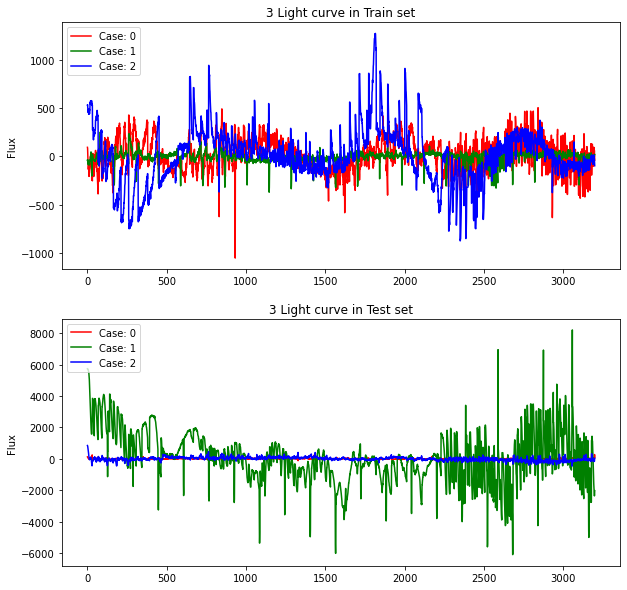

In [4]:
# 훈련셋과 시험셋의 외계행성 있는 광도 곡선 3개 확인
plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.title('3 Light curve in Train set')
plt.ylabel('Flux')
plt.plot(list(range(1,3198)), X_train[0],'r', label = 'Case: 0')
plt.plot(list(range(1,3198)), X_train[1],'g', label = 'Case: 1')
plt.plot(list(range(1,3198)), X_train[2],'b', label = 'Case: 2')
plt.legend(loc = 'upper left')

plt.subplot(212)
plt.title('3 Light curve in Test set')
plt.ylabel('Flux')
plt.plot(list(range(1,3198)), X_test[0],'r', label = 'Case: 0')
plt.plot(list(range(1,3198)), X_test[1],'g', label = 'Case: 1')
plt.plot(list(range(1,3198)), X_test[2],'b', label = 'Case: 2')
plt.legend(loc = 'upper left')

1.3+ 훈련셋의 외계행성 있고 없는 광도곡선 37개씩, 시험셋의 외계행성 있고 없는 광도곡선 5개씩 그리기 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

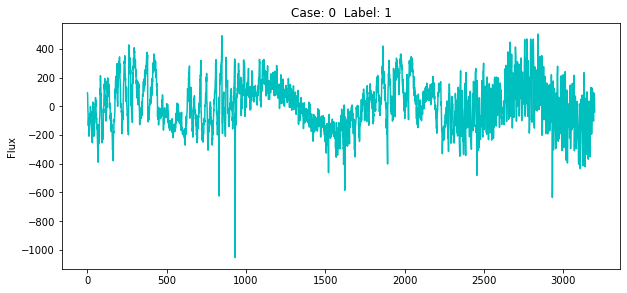

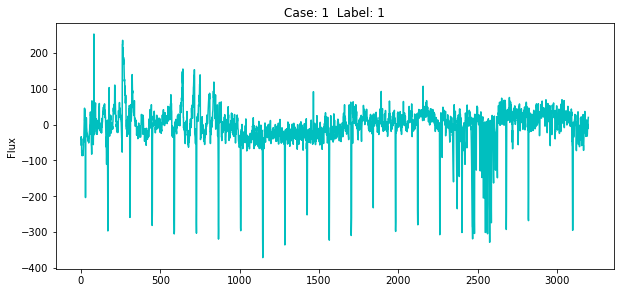

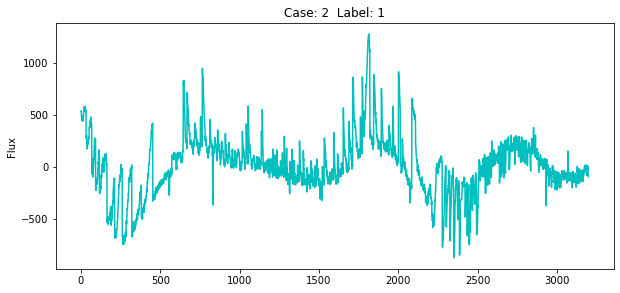

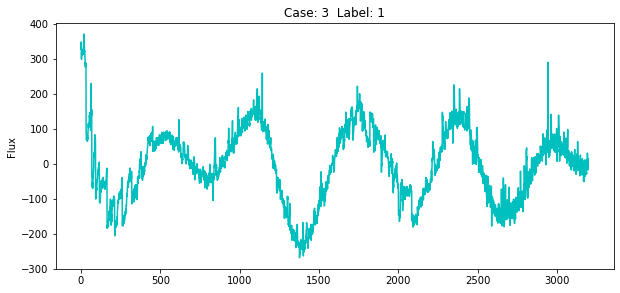

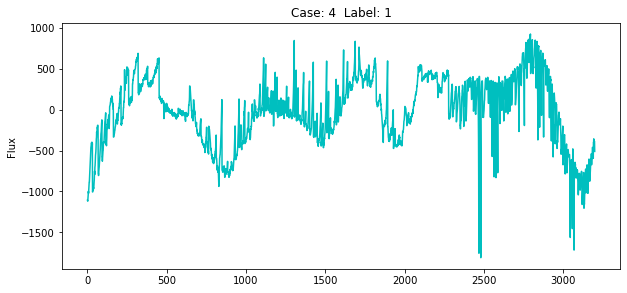

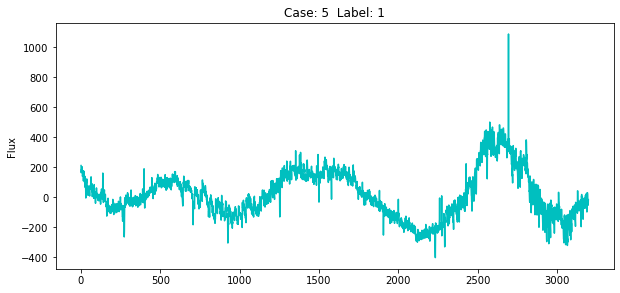

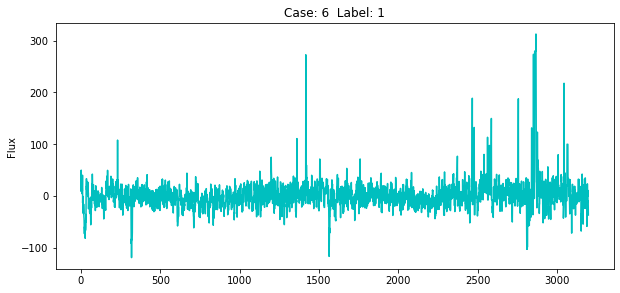

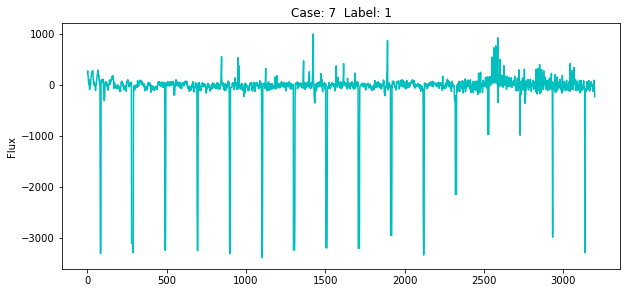

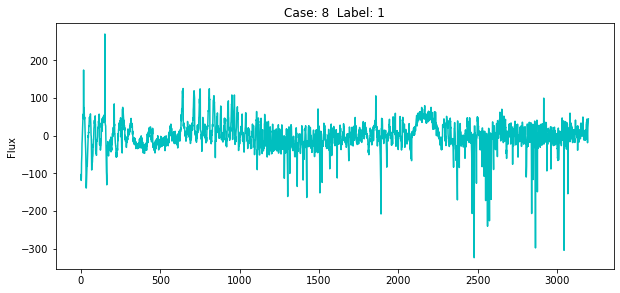

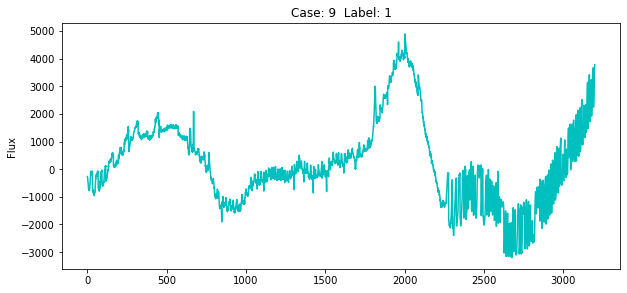

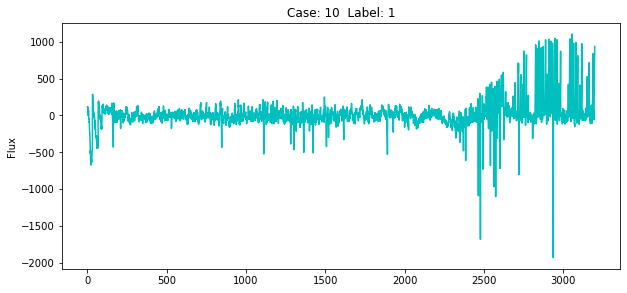

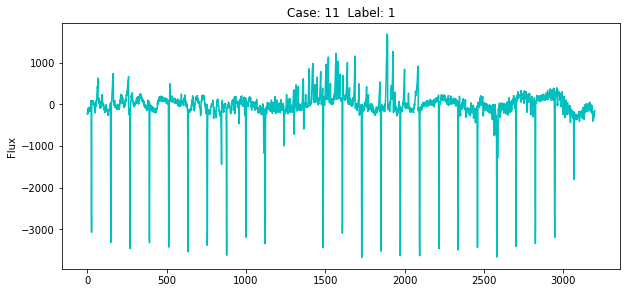

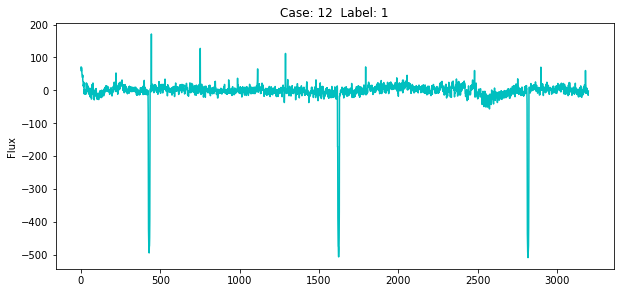

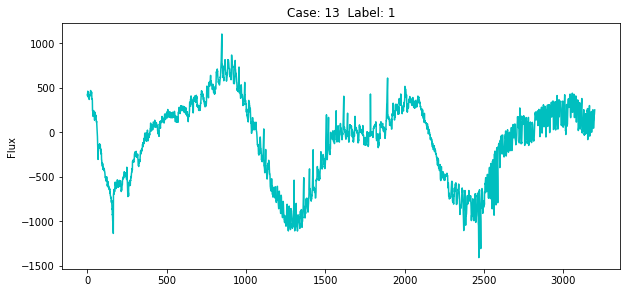

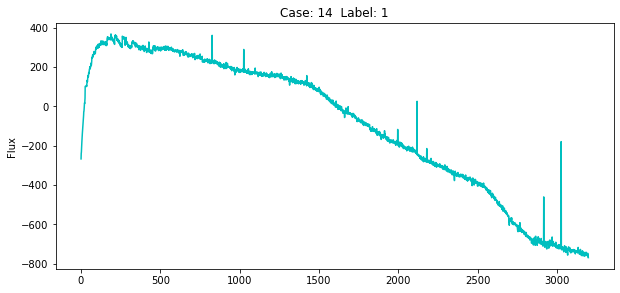

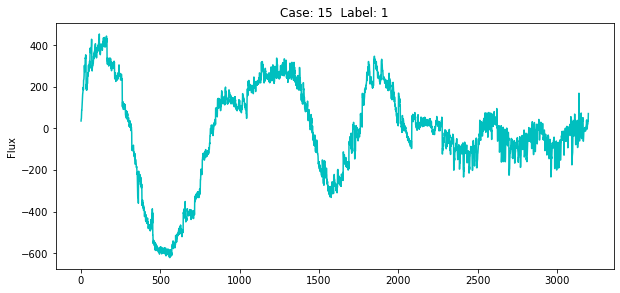

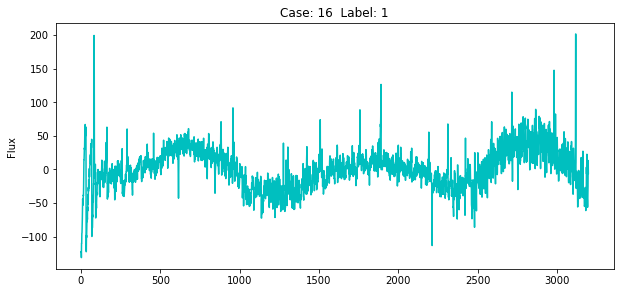

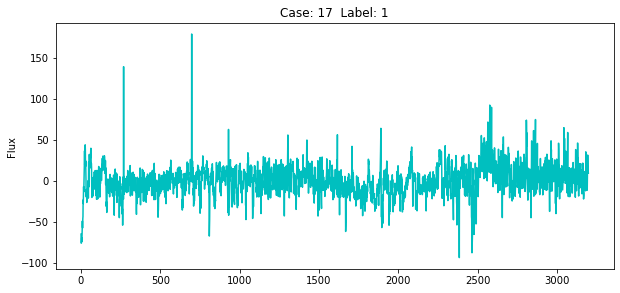

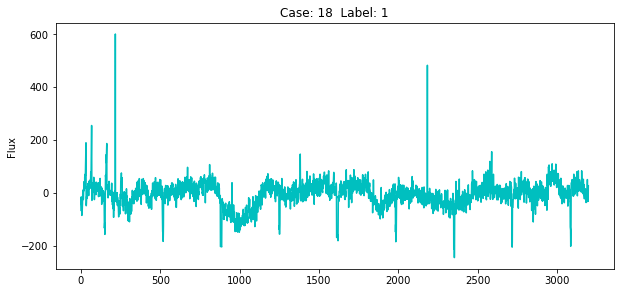

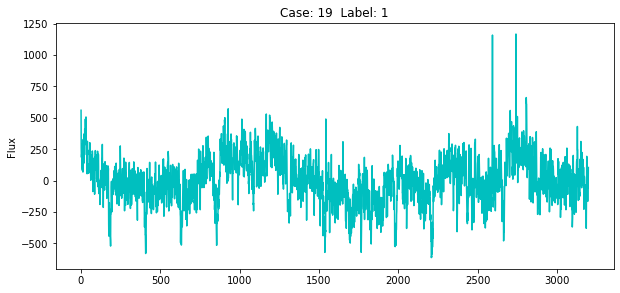

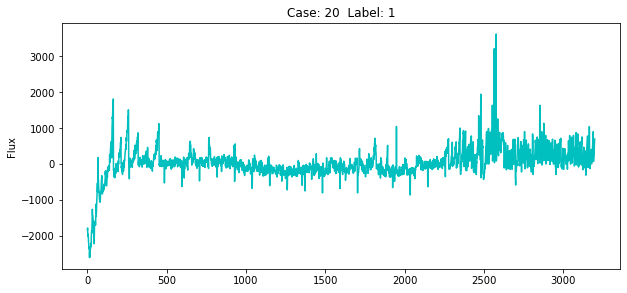

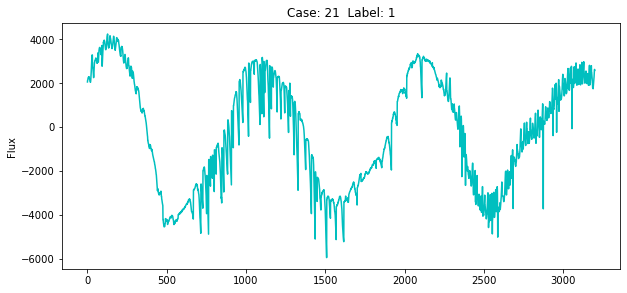

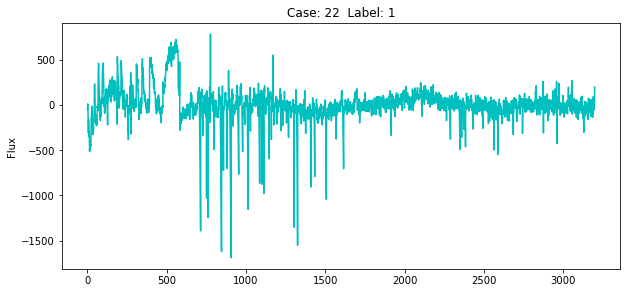

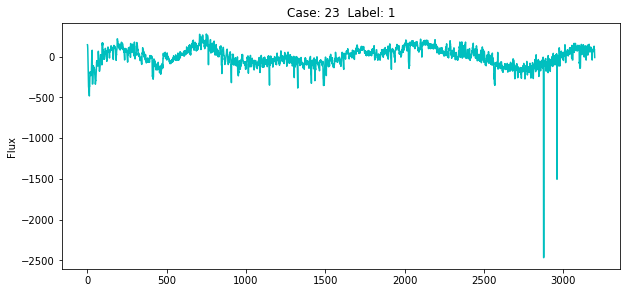

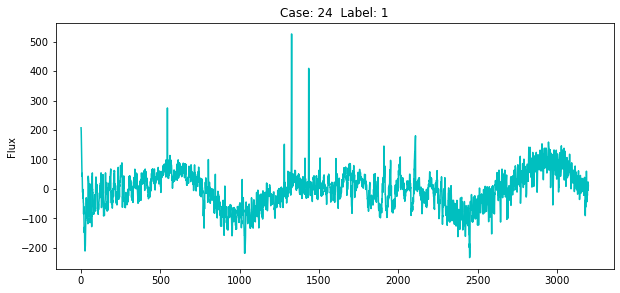

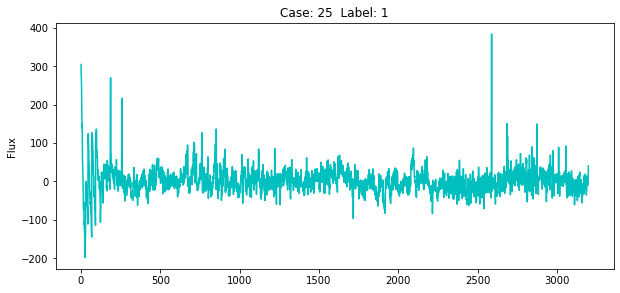

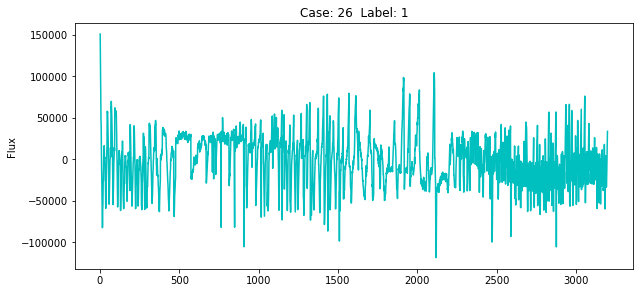

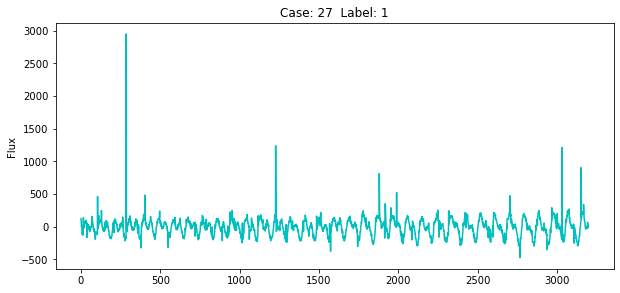

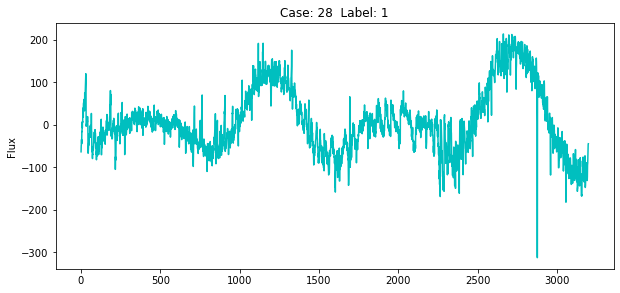

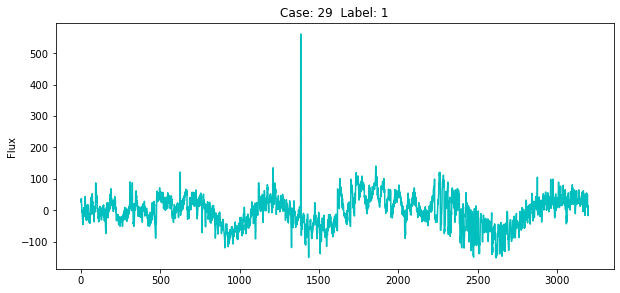

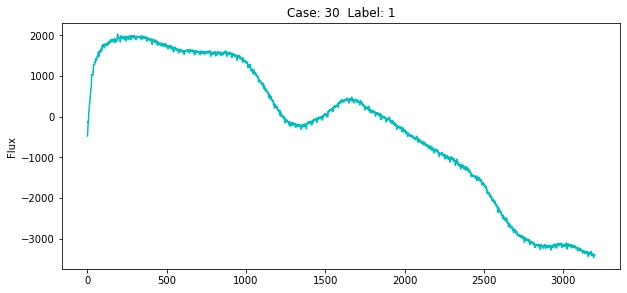

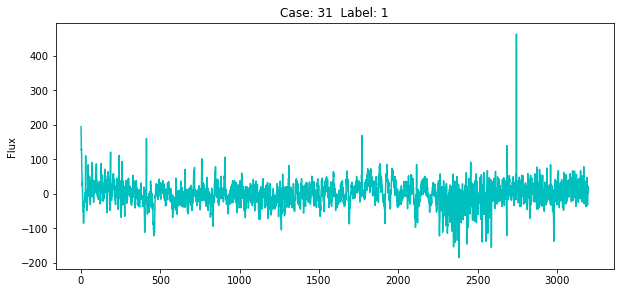

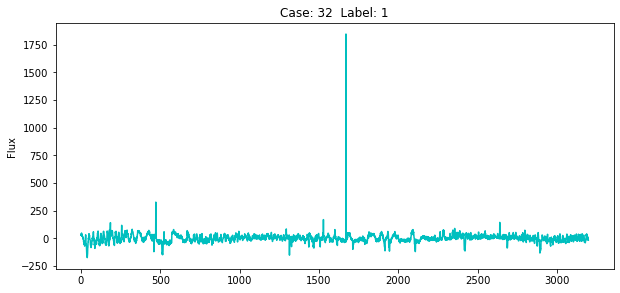

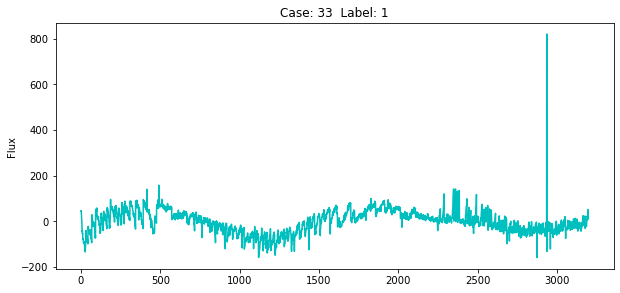

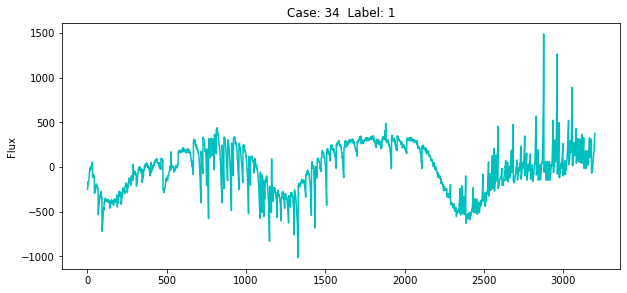

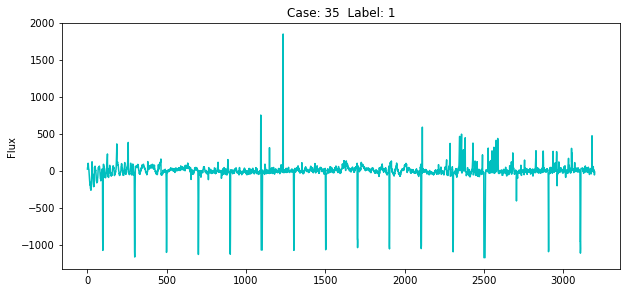

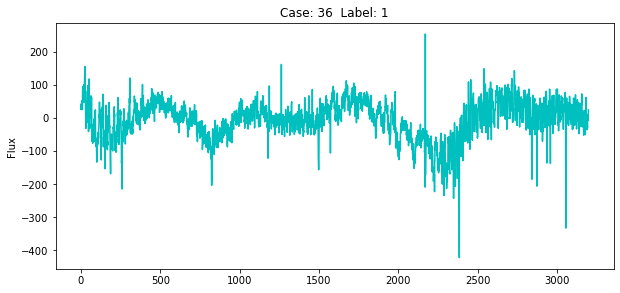

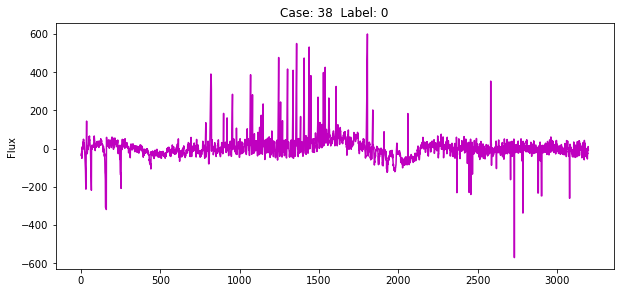

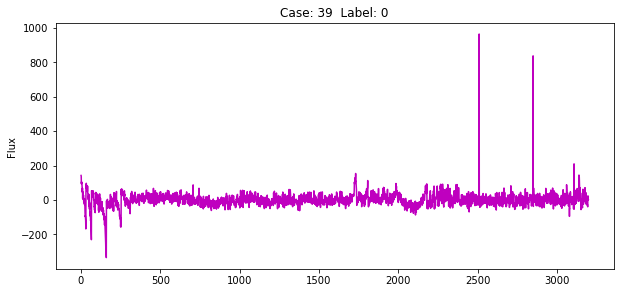

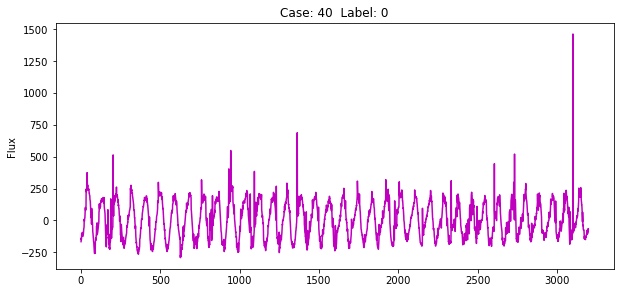

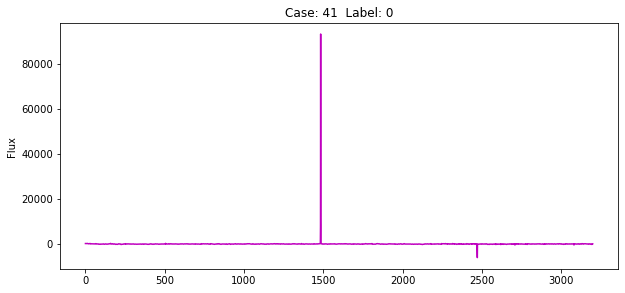

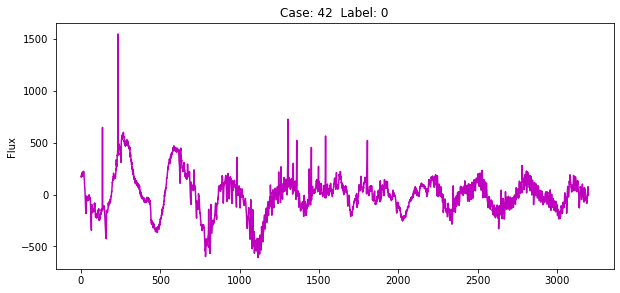

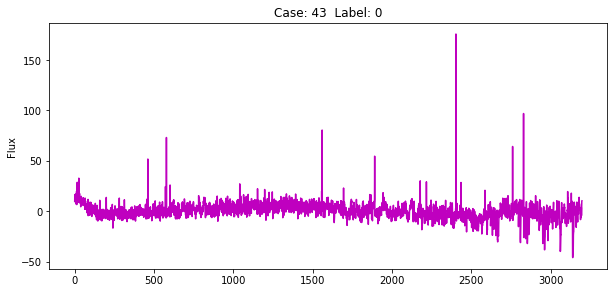

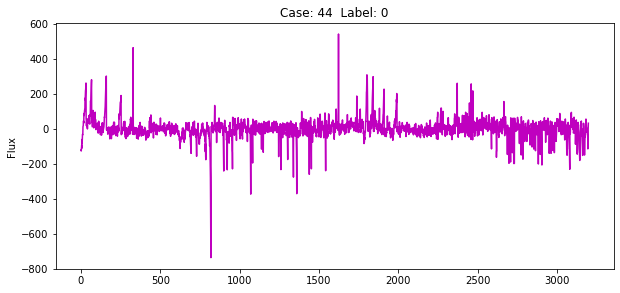

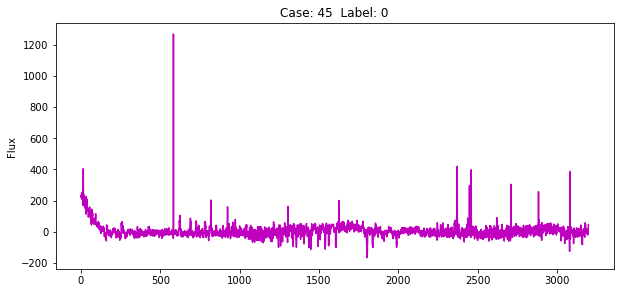

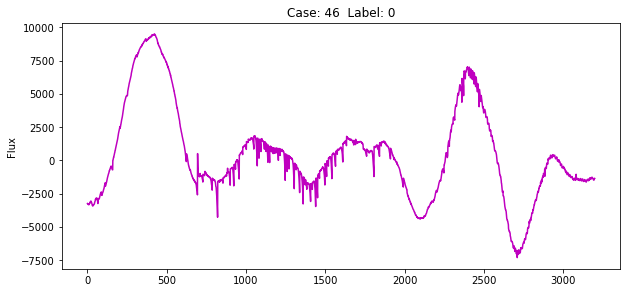

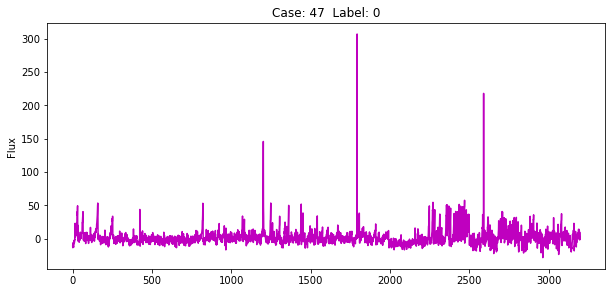

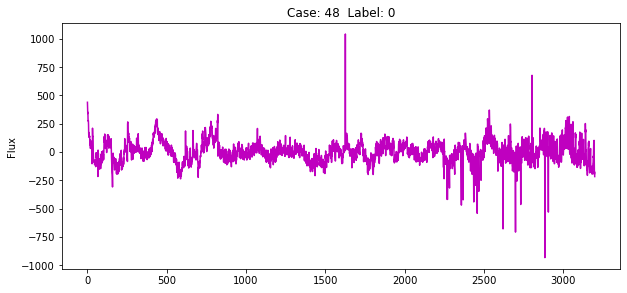

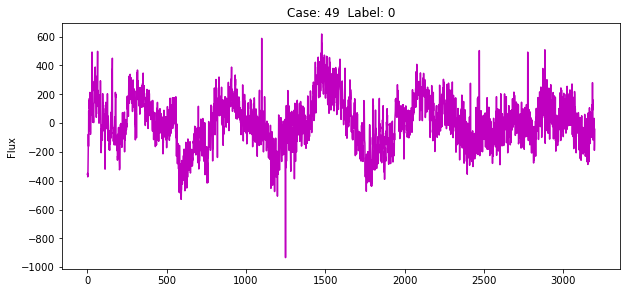

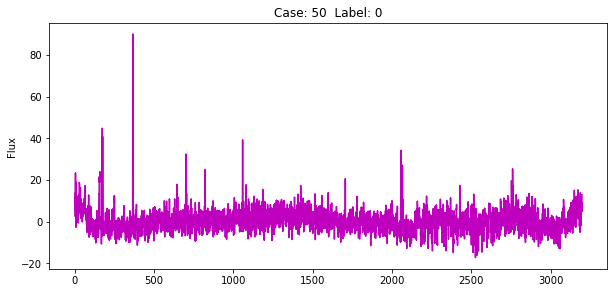

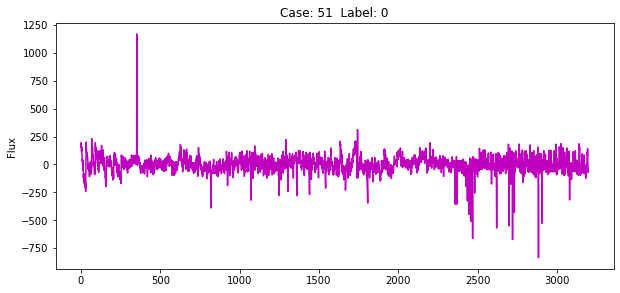

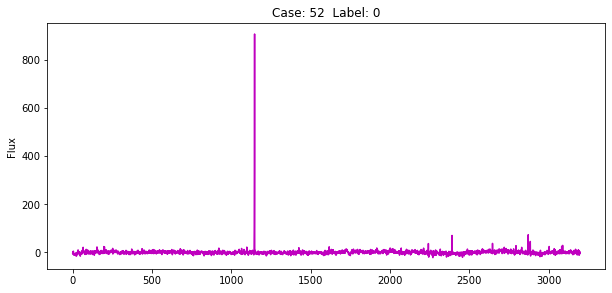

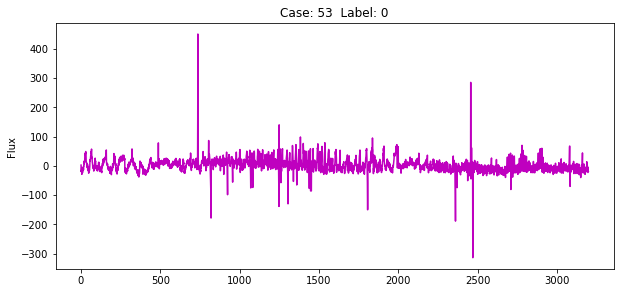

In [5]:
# 훈련셋
# 행성 있는 광도곡선 그리기
for i in range(37):
  plt.figure(figsize = (10, 200))
  plt.subplot(37,1,i+1)
  plt.title('Case: '+ str(i) + '  Label: 1')
  plt.ylabel('Flux')
  plt.plot(list(range(1,3198)), X_train[i],'c')

# 행성 없는 광도곡선 일부 그리기
for i in range(38, 54):
  plt.figure(figsize = (10, 200))
  plt.subplot(37,1,i-37)
  plt.title('Case: '+ str(i) + '  Label: 0')
  plt.ylabel('Flux')
  plt.plot(list(range(1,3198)), X_train[i],'m')

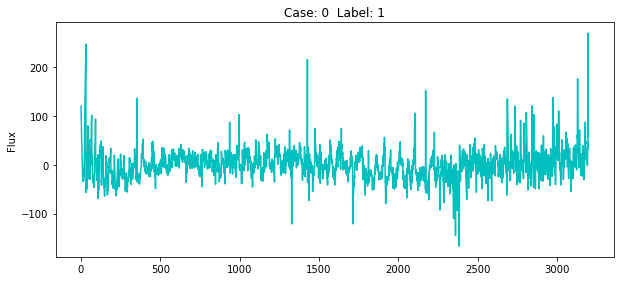

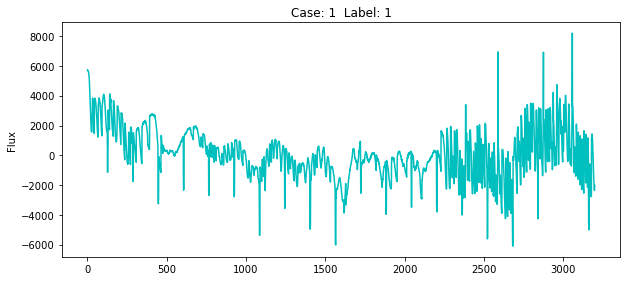

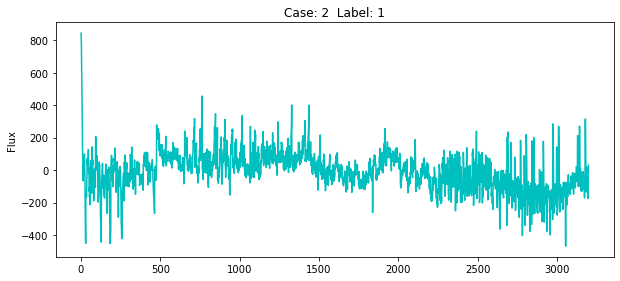

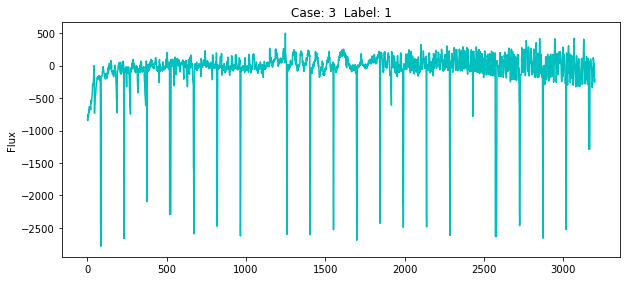

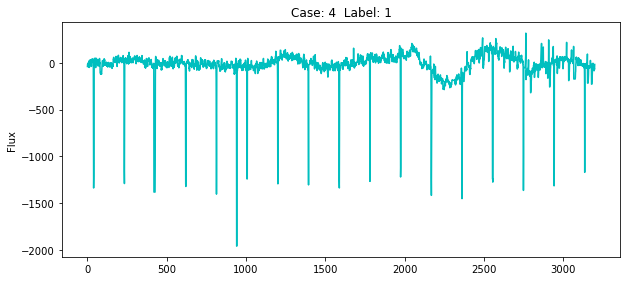

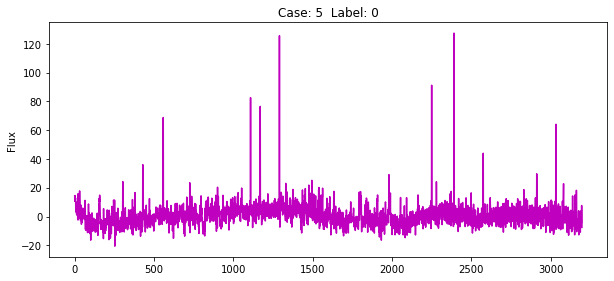

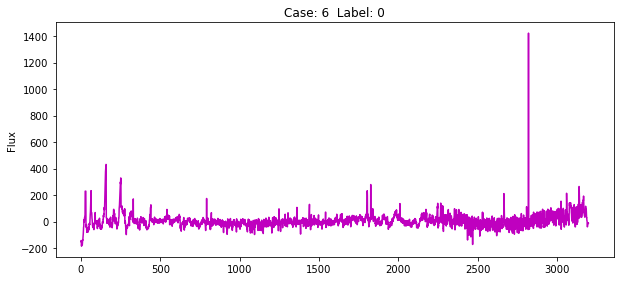

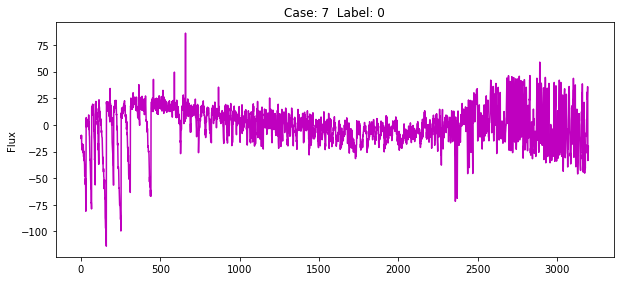

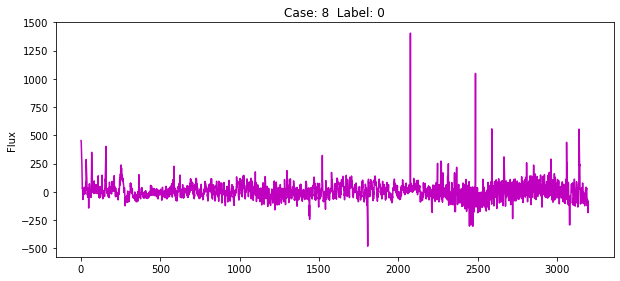

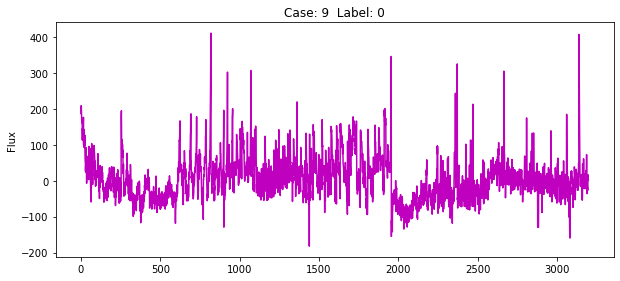

In [6]:
# 시험셋
# 행성 있는 광도곡선 그리기
for i in range(5):
  plt.figure(figsize = (10, 25))
  plt.subplot(5,1,i+1)
  plt.title('Case: '+ str(i) + '  Label: 1')
  plt.ylabel('Flux')
  plt.plot(list(range(1,3198)), X_test[i],'c')

# 행성 없는 광도곡선 일부 그리기
for i in range(5,10):
  plt.figure(figsize = (10, 25))
  plt.subplot(5,1,i-4)
  plt.title('Case: '+ str(i) + '  Label: 0')
  plt.ylabel('Flux')
  plt.plot(list(range(1,3198)), X_test[i],'m')

1.4 데이터 표준화하고 확인

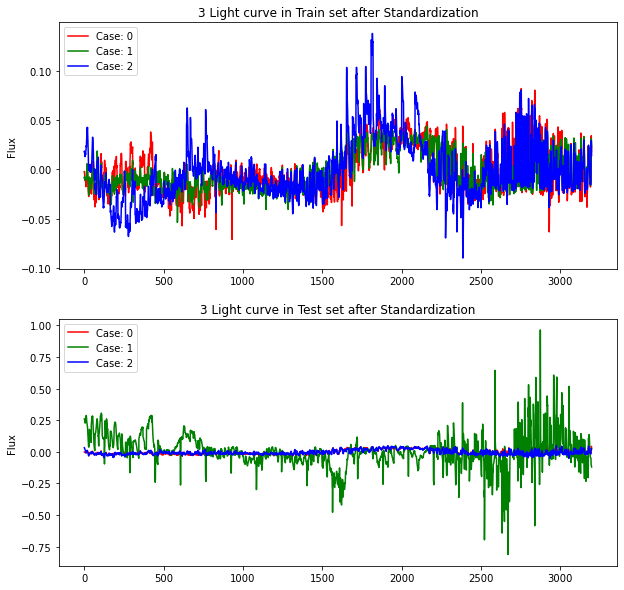

In [7]:
#Scale the data 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)   # 훈련셋은 transform만

# 훈련셋과 시험셋의 외계행성 있는 광도 곡선 3개 확인
plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.title('3 Light curve in Train set after Standardization')
plt.ylabel('Flux')
plt.plot(list(range(1,3198)), X_train[0],'r', label = 'Case: 0')
plt.plot(list(range(1,3198)), X_train[1],'g', label = 'Case: 1')
plt.plot(list(range(1,3198)), X_train[2],'b', label = 'Case: 2')
plt.legend(loc = 'upper left')

plt.subplot(212)
plt.title('3 Light curve in Test set after Standardization')
plt.ylabel('Flux')
plt.plot(list(range(1,3198)), X_test[0],'r', label = 'Case: 0')
plt.plot(list(range(1,3198)), X_test[1],'g', label = 'Case: 1')
plt.plot(list(range(1,3198)), X_test[2],'b', label = 'Case: 2')
plt.legend(loc = 'upper left')

1.5 SMOTE로 오버 샘플링하고 확인

Class=0, n=5050 (50.000%)
Class=1, n=5050 (50.000%)


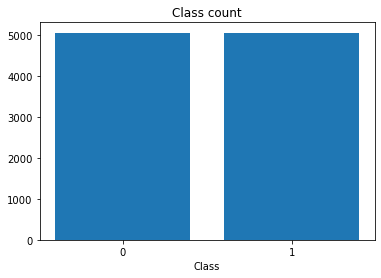

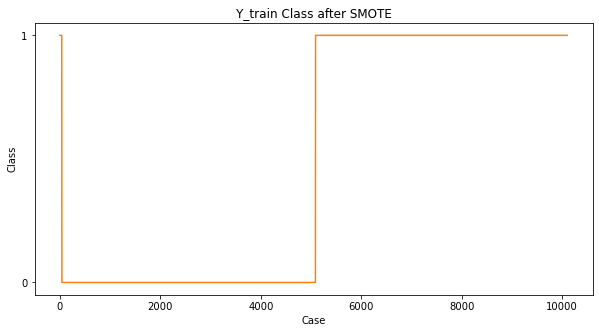

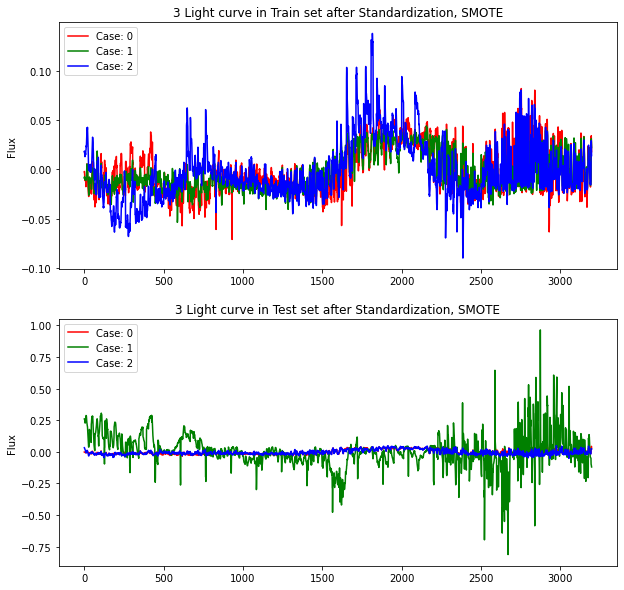

In [8]:
# 오버 샘플링
from imblearn.over_sampling import SMOTE
X_train, Y_train = SMOTE(random_state=1).fit_resample(X_train, Y_train)

Y_train = Y_train.reshape(len(Y_train),1)  # 1차원 ndarray로 나오길래 2차원 ndarray로 바꿔줌

classcount(Y_train)  # class 개수 그래프 그리기


# class 분포 확인
Y_t = Y_train.reshape(len(Y_train)) # 2차원 ndarray를 1차원으로 
#print(Y_t.shape)
Y_t = Y_t[:]
plt.figure(figsize = (10,5))
plt.ylabel('Class')
plt.xlabel('Case')
plt.title('Y_train Class after SMOTE')
plt.yticks([0,1])
plt.plot(list(range(len(Y_t))),Y_t,'C1')


# 훈련셋과 시험셋의 외계행성 있는 광도 곡선 3개 확인
plt.figure(figsize = (10, 10))
plt.subplot(211)
plt.title('3 Light curve in Train set after Standardization, SMOTE')
plt.ylabel('Flux')
plt.plot(list(range(1,3198)), X_train[0],'r', label = 'Case: 0')
plt.plot(list(range(1,3198)), X_train[1],'g', label = 'Case: 1')
plt.plot(list(range(1,3198)), X_train[2],'b', label = 'Case: 2')
plt.legend(loc = 'upper left')

plt.subplot(212)
plt.title('3 Light curve in Test set after Standardization, SMOTE')
plt.ylabel('Flux')
plt.plot(list(range(1,3198)), X_test[0],'r', label = 'Case: 0')
plt.plot(list(range(1,3198)), X_test[1],'g', label = 'Case: 1')
plt.plot(list(range(1,3198)), X_test[2],'b', label = 'Case: 2')
plt.legend(loc = 'upper left')

In [9]:
#print(X_train.shape)
#print(Y_train.shape)
#print(X_train)

#print(type(X_train))
#print(type(Y_train))

In [10]:
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)
#print(X_train)
#print(Y_train)

1.6 CNN에 맞게 입력값 shape 변경

In [11]:
# 입력값 shape 변경(CNN을 쓰기 위해 요구됨)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

#print(X_train.shape)
#print(X_test.shape)
#print(X_train)
#print(X_test)

1.7 검증셋 생성

In [12]:
# 검증셋 생성
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

#print(Y_val)
print(Y_val.shape)
#print(type(Y_val))
#print(X_train)

(1010, 1)


2.0 CNN 모델 생성

#Importing convolutional layers
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
import keras

classifier = Sequential()
classifier.add(Dense(32, activation = "relu", input_shape=(3197,)))
classifier.add(Dense(32, activation = "relu"))
classifier.add(Dense(32, activation = "relu"))
classifier.add(Dense(1, activation = "sigmoid"))
classifier.summary()

optimizer = keras.optimizers.Adam(lr = 0.0002)
classifier.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
#Importing convolutional layers
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
import keras

#Initialising the CNN 
classifier = Sequential()
#1.Convolution
classifier.add(Convolution1D(filters=8, kernel_size=11, activation="relu", input_shape=(3197,1)))
#2.Max Pooling
classifier.add(MaxPooling1D(strides=4))
classifier.add(Convolution1D(filters=8, kernel_size=11, activation="relu"))
classifier.add(MaxPooling1D(strides=4))
classifier.add(BatchNormalization())
#3.Flattening
classifier.add(Flatten())
#4.Full Connection
classifier.add(Dropout(0.5))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

classifier.summary()

optimizer = keras.optimizers.Adam(lr = 0.0002)
classifier.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3187, 8)           96        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 797, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 787, 8)            712       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 197, 8)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 197, 8)            32        
_________________________________________________________________
flatten (Flatten)            (None, 1576)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1576)              0

3.0 모델 훈련

In [14]:
#Train!
epochs = 10
hist = classifier.fit(X_train, Y_train, batch_size=32, epochs=epochs, validation_data=(X_val,Y_val))

Epoch 1/10
285/285 [==============================] - 1s 5ms/step - loss: 0.6569 - accuracy: 0.5849 - val_loss: 0.6676 - val_accuracy: 0.5287
Epoch 2/10
285/285 [==============================] - 1s 4ms/step - loss: 0.5736 - accuracy: 0.6858 - val_loss: 0.5803 - val_accuracy: 0.7495
Epoch 3/10
285/285 [==============================] - 1s 4ms/step - loss: 0.4751 - accuracy: 0.7707 - val_loss: 0.4748 - val_accuracy: 0.8871
Epoch 4/10
285/285 [==============================] - 1s 4ms/step - loss: 0.3773 - accuracy: 0.8358 - val_loss: 0.3513 - val_accuracy: 0.9634
Epoch 5/10
285/285 [==============================] - 1s 5ms/step - loss: 0.2898 - accuracy: 0.8845 - val_loss: 0.2388 - val_accuracy: 0.9752
Epoch 6/10
285/285 [==============================] - 1s 4ms/step - loss: 0.2339 - accuracy: 0.9098 - val_loss: 0.2006 - val_accuracy: 0.9752
Epoch 7/10
285/285 [==============================] - 1s 4ms/step - loss: 0.1793 - accuracy: 0.9338 - val_loss: 0.1020 - val_accuracy: 0.9911
Epoch 

4.0 훈련셋과 검증셋의 loss와 정확도 그래프 그리기, 시험셋 평가

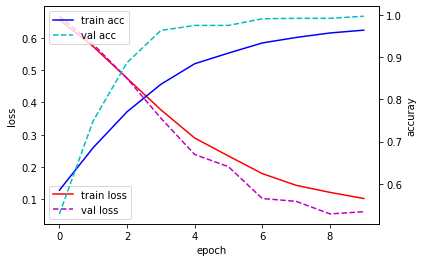

In [15]:
# loss, 정확도 그래프 그리기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'm', label='val loss',linestyle='--')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'c', label='val acc',linestyle='--')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower left')
acc_ax.legend(loc='upper left')

plt.show()

4.1 시험셋 평가

In [16]:
# 시험셋 평가
score = classifier.evaluate(X_test, Y_test)

18/18 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9912


4.2 제출 답안 확인

(570,)


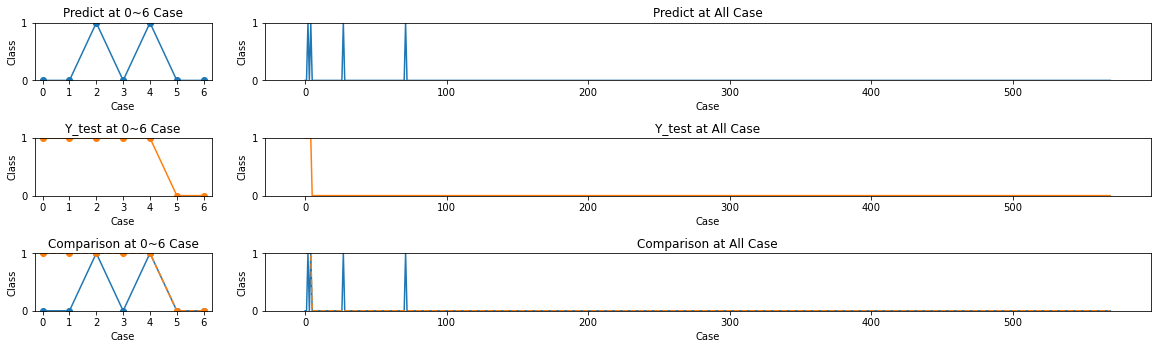

In [17]:
# 시험셋 제출 답안 확인하기
predict = classifier.predict(X_test) # 학습된 모델에 x_data를 넣어서 예측값 출력해보기
predict = predict.reshape(len(predict)) # 2차원 ndarray를 1차원으로
predict = np.round(predict) # 반올림해서 0 또는 1로
predict = list(map(int, predict)) # int로 바꿔주고 list로 

Y_test = Y_test.reshape(len(Y_test)) # 2차원 ndarray를 1차원으로 
print(Y_test.shape)


# 그래프로 나타내기
from matplotlib import gridspec

plt.figure(figsize = (20,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=1)

gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=2, # col 몇 개
                       height_ratios=[1, 1, 1],
                       width_ratios=[1, 5])



ax0 = plt.subplot(gs[0])
plt.ylim([0,1])
plt.yticks([0,1])
plt.xticks([0,1,2,3,4,5,6])
plt.ylabel('Class')
plt.xlabel('Case')
plt.title('Predict at 0~6 Case')
ax0.plot(list(range(7)),predict[:7],'C0o-')
                       
ax1 = plt.subplot(gs[1])
plt.ylim([0,1])
plt.yticks([0,1])
plt.ylabel('Class')
plt.xlabel('Case')
plt.title('Predict at All Case')
ax1.plot(list(range(570)),predict[:570],'C0')

ax2 = plt.subplot(gs[2])
plt.ylim([0,1])
plt.yticks([0,1])
plt.xticks([0,1,2,3,4,5,6])
plt.ylabel('Class')
plt.xlabel('Case')
plt.title('Y_test at 0~6 Case')
ax2.plot(list(range(7)),Y_test[:7],'C1o-')
           
ax3 = plt.subplot(gs[3])
plt.ylim([0,1])
plt.yticks([0,1])
plt.ylabel('Class')
plt.xlabel('Case')
plt.title('Y_test at All Case')
ax3.plot(list(range(570)),Y_test[:570],'C1')           

ax4 = plt.subplot(gs[4])
plt.ylim([0,1])
plt.yticks([0,1])
plt.xticks([0,1,2,3,4,5,6])
plt.ylabel('Class')
plt.xlabel('Case')
plt.title('Comparison at 0~6 Case')
ax4.plot(list(range(7)),predict[:7],'C0o-')
ax4.plot(list(range(7)),Y_test[:7],'C1o--')
           
ax5 = plt.subplot(gs[5])
plt.ylim([0,1])
plt.yticks([0,1])
plt.ylabel('Class')
plt.xlabel('Case')
plt.title('Comparison at All Case')
ax5.plot(list(range(570)),predict[:570],'C0')
ax5.plot(list(range(570)),Y_test[:570],'C1--')
           

        accuracy: 99.12280701754386%
average accuracy: 69.82300884955752%
       precision: 50.0%


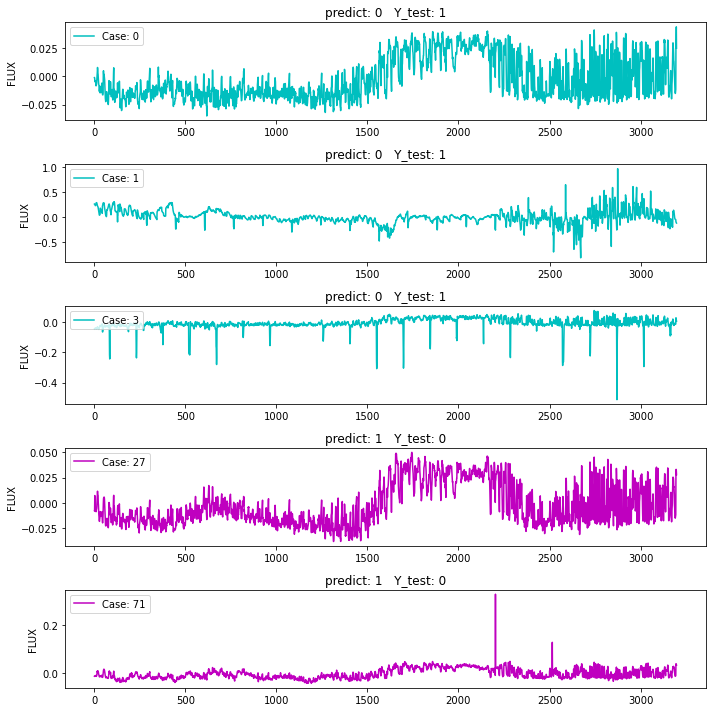

In [18]:
# 몇 개를 어디서 틀렸는지 구하기
c = 0
c1= 0
c2= 0
c3= 0
d = []
for i in range(570):
    if predict[i] != Y_test[i]:   # 틀리면 c에 +1
        c += 1
        d.append(i)               
        if i <= 4:                # 외계행성 있는 것을 틀렸으면 c1에 +1
            c1 += 1
        else:                     # 외계행성 없는 것을 틀렸으면 c2에 +1
            c2 += 1
        
    if predict[i] == 1:           # 외계행성을 있다고 했으면 c3에 +1
        c3 += 1

    
      
# 정확도, 평균정확도 출력
acc = (570 - c)/570 *100                                  # 정확도는 맞춘 개수/전체 개수
ave_acc = ((5 - c1)/5 + (565 - c2)/565)/2 * 100           # 평균정확도는 각각의 정확도의 평균

print('        accuracy: '+str(acc)+'%')    
print('average accuracy: ' + str(ave_acc) +'%')
if c3 == 0:
    print('       precision: x')
else:
    precision = (5-c1)/c3*100                                 # 정밀도는 실제 양성의 수/양성이라고 판정한 수
    print('       precision: ' + str(precision) +'%') 
#print('      wrong case:',d)  

# 틀린 그래프 그리기      
plt.figure(figsize = (10, 10))

for i in range(c):
    plt.subplot(c,1,i+1)
    plt.ylabel('FLUX')
    plt.title('predict: ' + str(predict[d[i]])+'   Y_test: ' + str(Y_test[d[i]]))
    if Y_test[d[i]] == 1:
      plt.plot(list(range(1,3198)), X_test[d[i]],'c',label = 'Case: '+str(d[i]))
    else:
      plt.plot(list(range(1,3198)), X_test[d[i]],'m',label = 'Case: '+str(d[i]))
    plt.legend(loc='upper left')
        
plt.tight_layout()

# 정확도, 평균정확도, 정밀도 저장해두고 그래프 그리기
acc_list = [0 for i in range(100)]
ave_acc_list = [0  for i in range(100)]
precision_list = [0  for i in range(100)]

acc_list[epochs-1] = acc
ave_acc_list[epochs-1] = ave_acc
precision_list[epochs-1] = precision

plt.xlabel('epochs')
plt.plot(list(range(1,101)),acc_list,label = 'acc')
plt.plot(list(range(1,101)),ave_acc_list, label = 'ave_acc')
plt.plot(list(range(1,101)),precision_list,label = 'precision')

plt.legend()